In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [102]:
x,y = make_moons(n_samples = 200, noise = 0.2,random_state = 42)

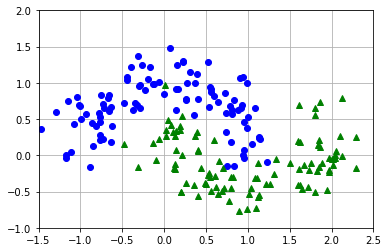

In [103]:
plt.plot(x[:,0][y==0], x[:,1][y==0], 'bo')
plt.plot(x[:,0][y==1], x[:,1][y==1], 'g^')
plt.grid()
plt.axis([-1.5,2.5,-1,2.0])
plt.show()

In [104]:
def plot_dataset(x,y,axes):
    plt.plot(x[:,0][y==0], x[:,1][y==0], 'bo')
    plt.plot(x[:,0][y==1], x[:,1][y==1], 'g^')
    plt.xlabel('X')
    plt.ylabel('y', rotation = 0)
    plt.grid()
    plt.axis(axes)
    plt.show()

In [105]:
x_,y_ = make_moons(n_samples = 2, random_state=42, noise = 0.15)
np.set_printoptions(precision = 2)

In [106]:
x_

array([[-0.08,  0.58],
       [ 1.07,  0.21]])

In [107]:
y_

array([1, 0], dtype=int64)

In [108]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)

In [109]:
x_1 = poly.fit_transform(x_)
x_1

array([[ 1.00e+00, -8.25e-02,  5.77e-01,  6.81e-03, -4.76e-02,  3.33e-01,
        -5.62e-04,  3.93e-03, -2.75e-02,  1.92e-01],
       [ 1.00e+00,  1.07e+00,  2.05e-01,  1.15e+00,  2.20e-01,  4.21e-02,
         1.23e+00,  2.35e-01,  4.51e-02,  8.65e-03]])

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
scaler = StandardScaler()
svc_clf = LinearSVC(C = 10, loss='hinge')

In [111]:
poly_svc_clf = Pipeline([('poly', poly),
                         ('scaler', scaler),
                         ('svc_clf',svc_clf)])

In [112]:
poly_svc_clf.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svc_clf', LinearSVC(C=10, loss='hinge'))])

In [113]:
# nx,ny = (10,10)
# x = np.linspace(0,1,nx)
# y = np.linspace(0,1,ny)
# x

In [114]:
# y

In [115]:
# xv,yv = np.meshgrid(x,y)
# xv

In [116]:
# yv

In [129]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

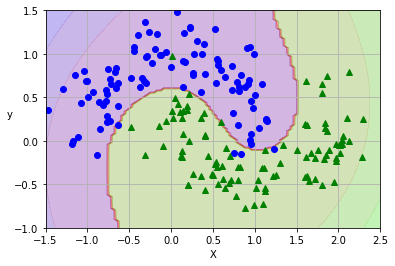

In [130]:
plot_predictions(poly_svc_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [83]:
r = np.arange(-1,1,0.5).reshape(-1,2)
r

array([[-1. , -0.5],
       [ 0. ,  0.5]])

In [84]:
r.ravel()

array([-1. , -0.5,  0. ,  0.5])

In [87]:
axes = [-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_svc_clf.predict(X).reshape(x0.shape)

In [101]:
X

array([[-1.5 , -1.  ],
       [-1.46, -1.  ],
       [-1.42, -1.  ],
       ...,
       [ 2.42,  1.5 ],
       [ 2.46,  1.5 ],
       [ 2.5 ,  1.5 ]])

In [96]:
y_decision = poly_svc_clf.decision_function(X).reshape(x0.shape)
y_decision.shape

(100, 100)